Organização do DataSet

Importação das bibliotecas necessárias para rodar o script


In [1]:
import os
import pickle
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

A variável mp_hands é responsável por fornecer as funcionalidades de rastreamento de mãos. Com ela, você pode detectar e acompanhar as posições das mãos em uma imagem ou vídeo.</br>
A variável mp_drawing fornece funções utilitárias para desenhar os landmarks, conexões e outras anotações sobre a imagem de saída. Isso é útil para visualizar os resultados do rastreamento das mãos.</br>
Por fim, a variável mp_drawing_styles fornece estilos de desenho predefinidos para os landmarks e conexões identificados nas mãos rastreadas.</br>

In [4]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

Cria um objeto hands que será usado para rastrear mãos em uma imagem estática, com uma confiança mínima de detecção definida como 0.3 (30%).

In [5]:
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

Define o diretório que vai acessar

In [6]:
DATA_DIR = './data'

Neste trecho ele vai iterar sobre as imagens dos diretórios específicos, extrair as coordenadas (x,y) das landmarks da mão detectadas nessas imagens e as armazena em uma lista de dados (data) juntamente com suas respectivas etiquetas (labels). Em seguida, os dados são salvos em um arquivo pickle chamado 'data.pickle'.

In [7]:
data = []
labels = []
for dir_ in os.listdir(DATA_DIR):
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []

        x_ = []
        y_ = []

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # count = 0
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))


            data.append(data_aux)
            labels.append(dir_)

f = open('data.pickle', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
/home/guilherme/.local/lib/python3.10/site-packages/google/protobuf/symbol_database.py:78: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Esse trecho repete o que foi feito a cima, mas para entender melhor o que acontece foram mostradas algumas imagens para facilitar a visualização do que ocorre nas iterações. Essa parte é somente uma ilustração do que ocorre, não tem nenhuma interferência no código.

counter 0


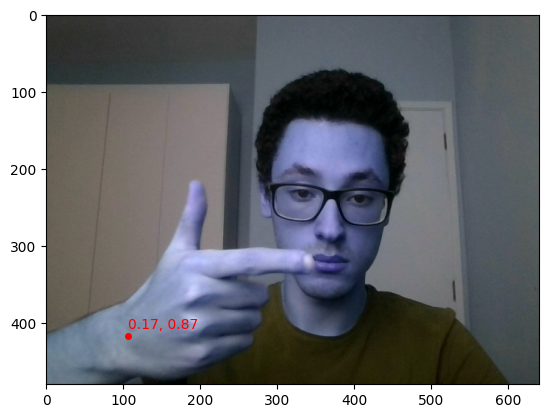

counter 1


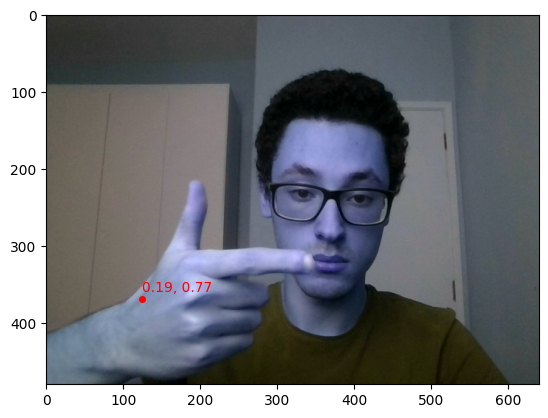

counter 2


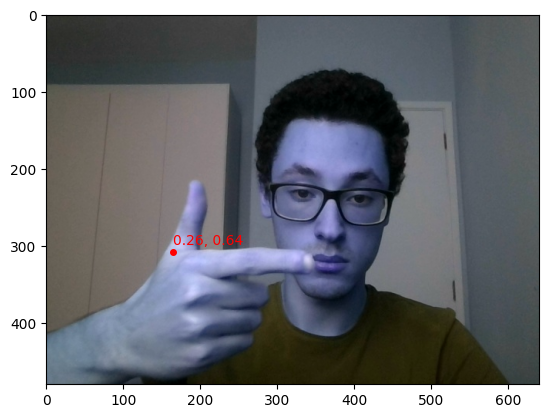

counter 3


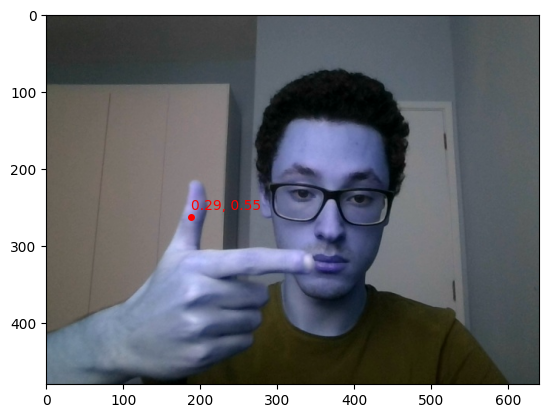

counter 4


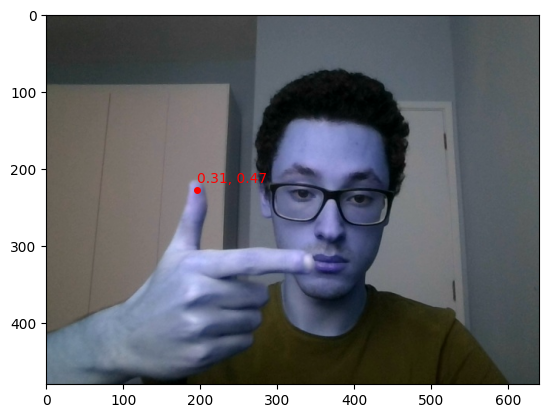

counter 5


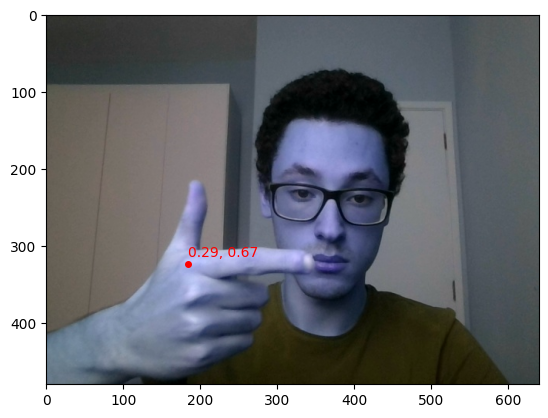

counter 6


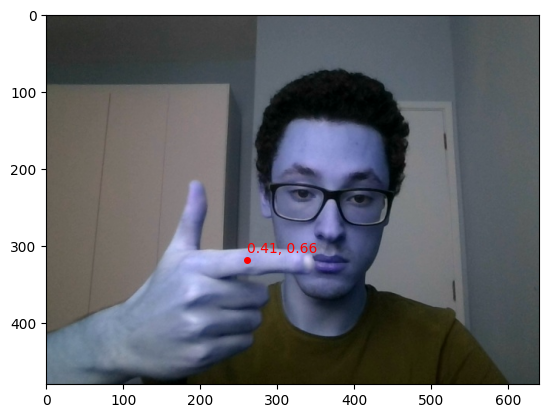

counter 7


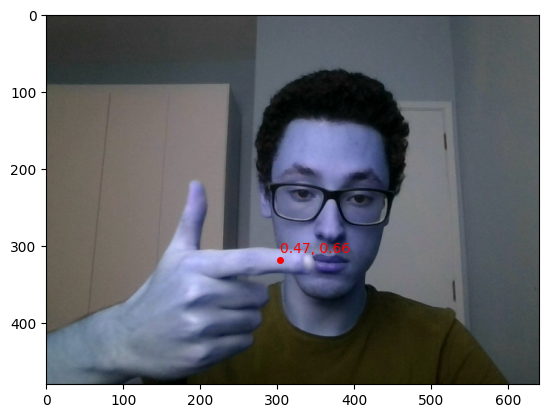

counter 8


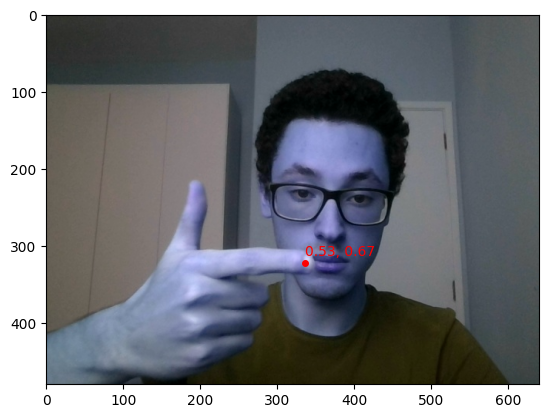

counter 9


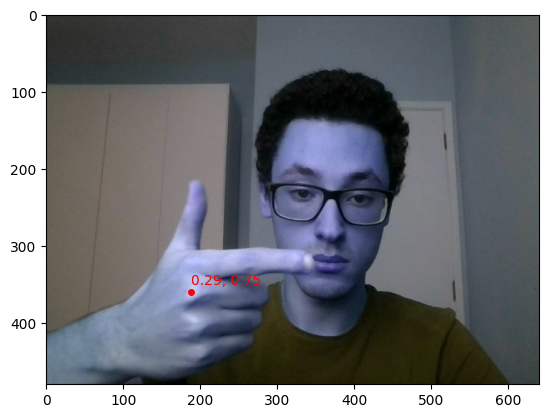

counter 10


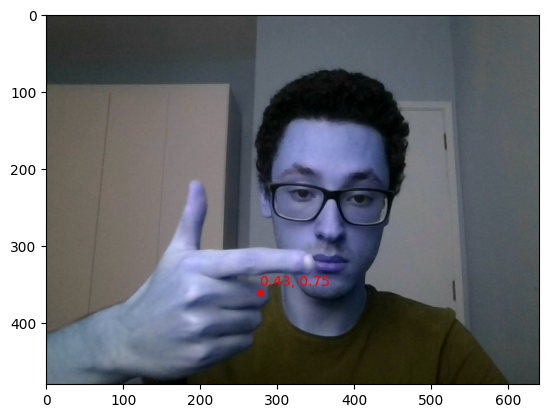

counter 11


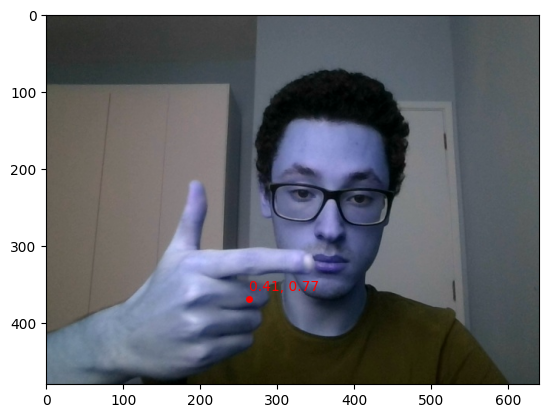

counter 12


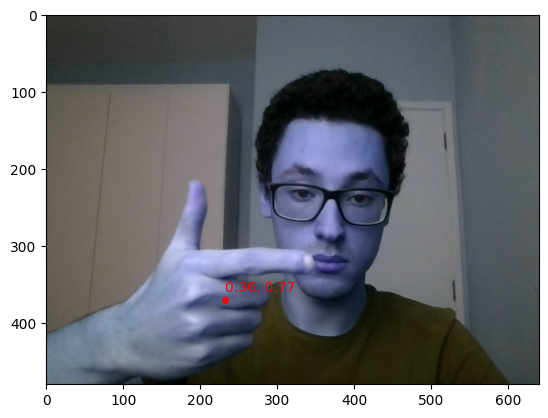

counter 13


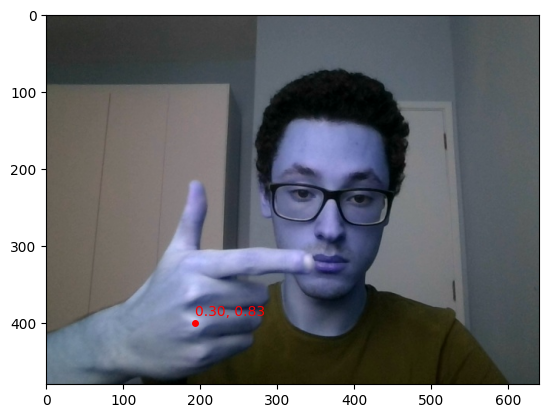

counter 14


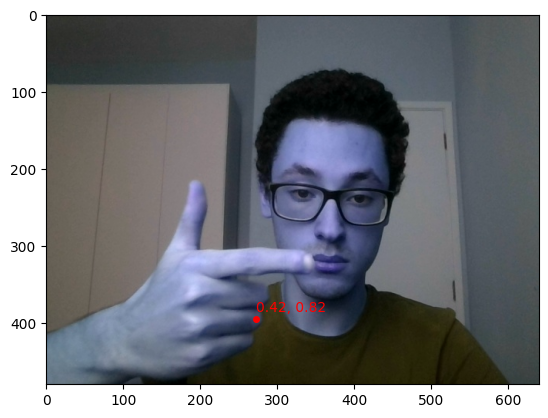

counter 15


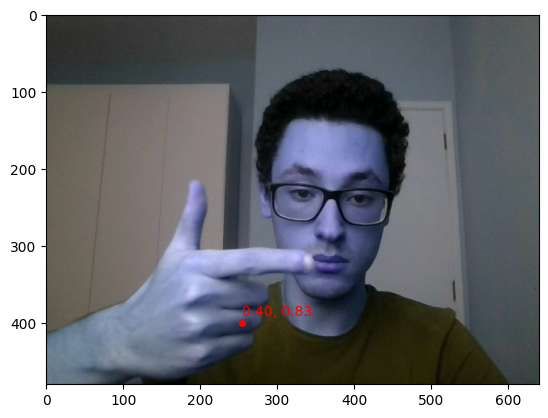

counter 16


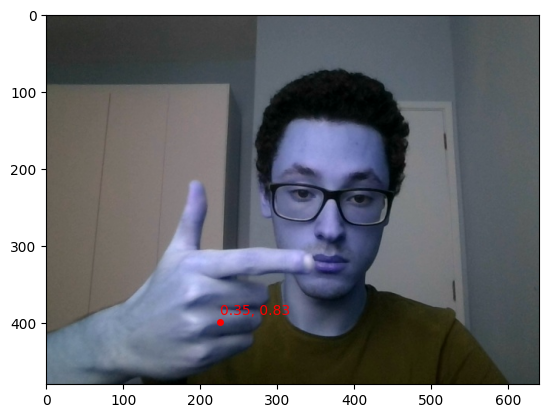

counter 17


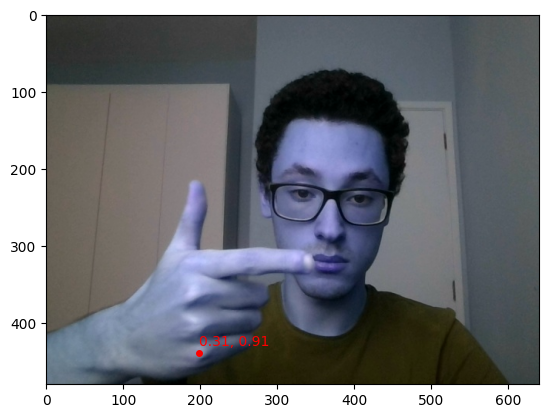

counter 18


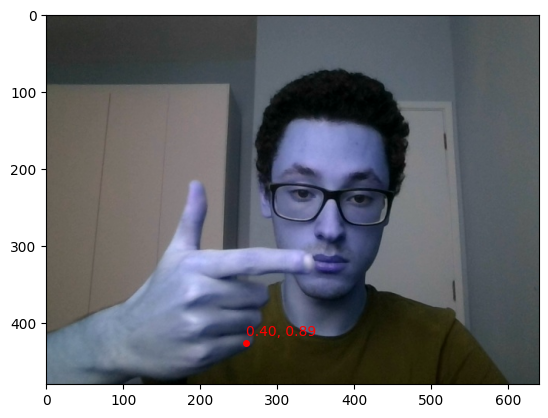

counter 19


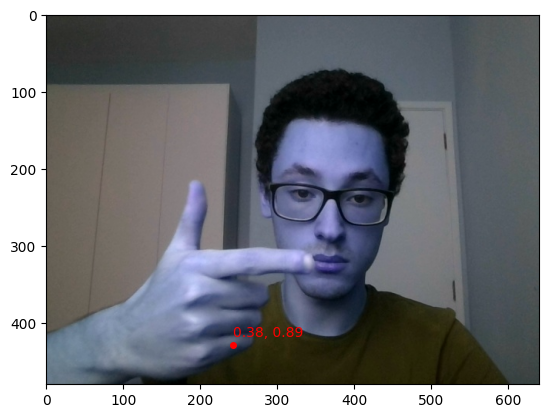

counter 20


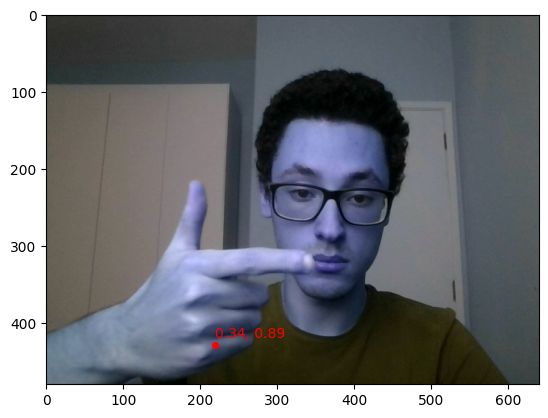

In [8]:
data = []
labels = []
countdir = 0
for dir_ in os.listdir(DATA_DIR):
    countimg = 0
    for img_path in os.listdir(os.path.join(DATA_DIR, dir_)):
        data_aux = []
        x_ = []
        y_ = []

        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        results = hands.process(img_rgb)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                count = 0
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y

                    x_.append(x)
                    y_.append(y)

                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x - min(x_))
                    data_aux.append(y - min(y_))
                    
                    print('counter',count)
                    # Print coordinates on image
                    plt.text(x * img.shape[1], y * img.shape[0] - 10, f'{x:.2f}, {y:.2f}', color='red')
                    plt.plot(x * img.shape[1], y * img.shape[0], 'ro', markersize=4)
                    count += 1
                    plt.imshow(img)
                    plt.show()
                    if count>30:
                        break
        countimg += 1
        if countimg > 0:
            break                
    
    countdir += 1
    if countdir > 0:
        break
